In [7]:
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

In [16]:
def compute_IOU(x0, y0, w0, h0, x1, y1, w1, h1):
    x0B = x0 + w0
    x1B = x1 + w1

    y0B = y0 + h0
    y1B = y1 + h1

    ## Area of the two bounding boxes

    area0 = w0*h0
    area1 = w1*h1

    noIntersection = 0


    ## intersection coords

    # left x
    if x1 > x0:
        xInterMin = x1
        if xInterMin > x0B:
            noIntersection = 1
    else:
        xInterMin = x0
        if xInterMin > x1B:
            noIntersection = 1

    # right x
    if x1B < x0B:
        xInterMax = x1B
        if xInterMax < x0:
            noIntersection = 1
    else:
        xInterMax = x0B
        if xInterMax < x1:
            noIntersection = 1

    # top y
    if y0 > y1:
        yInterHigh = y0
        if yInterHigh > y1B:
            noIntersection = 1
    else:
        yInterHigh = y1
        if yInterHigh > y0B:
            noIntersection = 1

    # bottom y
    if y0B < y1B:
        yInterLow = y0B
        if yInterLow < y1:
            noIntersection = 1
    else:
        yInterLow = y1B
        if yInterLow < y0:
            noIntersection = 1

    if noIntersection:
        return 0


    ## finding intersection area

    deltaX = xInterMax - xInterMin
    deltaY = yInterLow - yInterHigh

    intersection = deltaX * deltaY
    union = area0 + area1 - intersection

    return intersection / union

IoU between Box 1 and Box 2: 0.1429
IoU between Box 1 and Box 3: 0.0000
IoU between Box 2 and Box 3: 0.0000


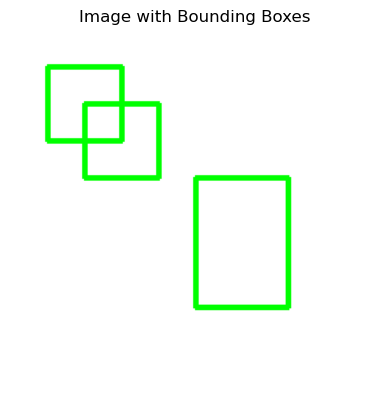

In [22]:
def plot_bounding_boxes(img, boxes):
    img_with_boxes = img.copy()
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return img_with_boxes

# Generate some test data
img_size = (200, 200, 3)
image = np.ones(img_size, dtype=np.uint8) * 255  # White background

# Define bounding boxes [x, y, width, height]
boxes = [
    (20, 20, 40, 40),
    (40, 40, 40, 40),
    (100, 80, 50, 70)
]

# Plot bounding boxes on the image
image_with_boxes = plot_bounding_boxes(image, boxes)

# Calculate IoU between all pairs of bounding boxes
for i in range(len(boxes)):
    for j in range(i + 1, len(boxes)):
        iou = compute_IOU(*boxes[i], *boxes[j])
        print(f"IoU between Box {i + 1} and Box {j + 1}: {iou:.4f}")

# Display the result
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Image with Bounding Boxes")
plt.axis('off')
plt.show()

In [21]:
print(0.25/(2-0.25))

0.14285714285714285
